In [1]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('./train.csv',header = 0)
test_data = data = pd.read_csv('./test.csv', header = 0)


In [2]:
import matplotlib.pyplot as plt
import yellowbrick
%matplotlib inline

In [3]:
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [4]:
df = pd.concat([train_data,test_data], axis=0,sort=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [5]:
df.loc[(df['Fare'].isnull()),'Fare'] = df[(df['Pclass']==3)&(df['Embarked']=='S')]['Fare'].mean()

In [6]:
Name_1 = df['Name'].str.split(',', expand=True)
Name_2 =  pd.DataFrame(Name_1[1].str.split('.', expand=True)[0].str.strip())
df['Title'] = Name_2
# df['Title'] 


In [7]:
Name_3 = pd.DataFrame(Name_1[1].str.split('.', expand=True)[1].str.strip()) 
df['Surname'] = Name_3
# df['Surname']

In [8]:
print(df['Title'].head())
Title_dic = {}
Title_dic.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_dic.update(dict.fromkeys(['Don', 'Sir', 'the Countess','Dona','Lady'], 'Royalty'))
Title_dic.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
Title_dic.update(dict.fromkeys(['Mlle','Miss'],'Miss'))
Title_dic.update(dict.fromkeys(['Mr'],'Mr'))
Title_dic.update(dict.fromkeys(['Master','Jonkheer'],'Master'))

df['Title'] = df['Title'].map(Title_dic)
# print(df['Title'].head())

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,William Henry


{1.0: 23, 0.0: 18}
{1.0: 129, 0.0: 55}
{0.0: 436, 1.0: 81}
{1.0: 101, 0.0: 26}
{0.0: 13, 1.0: 5}
{1.0: 3, 0.0: 1}


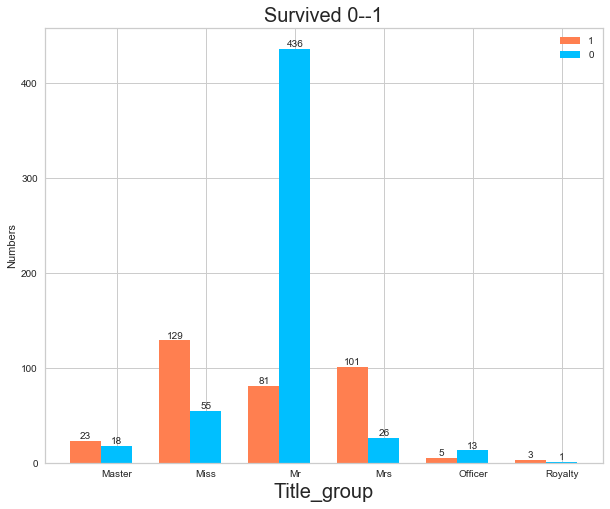

In [9]:
df_2 = df.set_index('Title')
sur = []
not_sur = []
for j in sorted(set(df['Title'])):
    try:
        d = dict(df_2.loc[j,'Survived'].value_counts())
        print(d)
        try:
            sur.append(d[1])
        except:
            sur.append(0)
        try:
            not_sur.append(d[0])
        except:
            not_sur.append(0)
    except:
        d = df_2.loc[j,'Survived']
        if d == 0:
            not_sur.append(d+1)
            sur.append(0)
        else:
            sur.append(d)
            not_sur.append(0)
#     print(sur)
#     print(not_sur)
ind = np.arange(len(set(df['Title'])))  # the x locations for the groups
#     print(ind)
width = 0.35       # the width of the bars
fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(ind, sur, width, color='coral')
rects2 = ax.bar(ind + width, not_sur, width, color='deepskyblue')

# add some text for labels, title and axes ticks
ax.set_ylabel('Numbers')
ax.set_xlabel('Title_group',fontsize=20)
ax.set_title('Survived 0--1',fontsize=20)
ax.set_xticks(ind + width)
ax.set_xticklabels(sorted(set(df['Title'])))
ax.legend((rects1[0], rects2[0]), ['1', '0'])


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,height,'%d' % int(height),ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
plt.show()

In [10]:
def group(x):
    if x >4:
        return 2
    elif x > 2:
        return 1
    else:
        return 0

df['Ticket'] = pd.DataFrame(df['Ticket'].map(dict(df['Ticket'].value_counts())))
df['Ticket_group'] = df['Ticket'].apply(group)
df.loc[:,['Ticket_group','Ticket']]

,Ticket_group,Ticket
0,0,1
1,0,2
2,0,1
3,0,2
4,0,1
5,0,1
6,0,2
7,2,5
8,1,3
9,0,2


In [11]:
df['Family_size'] = df['SibSp'] + df['Parch']+1

def family(x):
    if x>4:
        return 2
    elif x>2:
        return 1
    else:
        return 0
    
df['Family_label'] = df['Family_size'].apply(family)

In [12]:
df.loc[(df['Embarked'].isnull()), 'Embarked'] = 'C'

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Ticket_group,Family_size,Family_label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,7.2500,NaN,S,Mr,Owen Harris,0,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,71.2833,C85,C,Mrs,John Bradley (Florence Briggs Thayer),0,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,7.9250,NaN,S,Miss,Laina,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,53.1000,C123,S,Mrs,Jacques Heath (Lily May Peel),0,2,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,1,8.0500,NaN,S,Mr,William Henry,0,1,0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,1,8.4583,NaN,Q,Mr,James,0,1,0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,2,51.8625,E46,S,Mr,Timothy J,0,1,0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,5,21.0750,NaN,S,Master,Gosta Leonard,2,5,2
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,3,11.1333,NaN,S,Mrs,Oscar W (Elisabeth Vilhelmina Berg),1,3,1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,2,30.0708,NaN,C,Mrs,Nicholas (Adele Achem),0,2,0


In [13]:
df.loc[df['Cabin'].isnull(),'Cabin'] = 'U'
df['Cabin_label'] = df['Cabin'].str[0]

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Ticket_group,Family_size,Family_label,Cabin_label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,7.2500,U,S,Mr,Owen Harris,0,2,0,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,71.2833,C85,C,Mrs,John Bradley (Florence Briggs Thayer),0,2,0,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,7.9250,U,S,Miss,Laina,0,1,0,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,53.1000,C123,S,Mrs,Jacques Heath (Lily May Peel),0,2,0,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,1,8.0500,U,S,Mr,William Henry,0,1,0,U
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,1,8.4583,U,Q,Mr,James,0,1,0,U
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,2,51.8625,E46,S,Mr,Timothy J,0,1,0,E
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,5,21.0750,U,S,Master,Gosta Leonard,2,5,2,U
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,3,11.1333,U,S,Mrs,Oscar W (Elisabeth Vilhelmina Berg),1,3,1,U
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,2,30.0708,U,C,Mrs,Nicholas (Adele Achem),0,2,0,U


## 预测年龄

In [14]:
df_for_age = df[['Age','Pclass','Sex','Title']]
df_for_age

,Age,Pclass,Sex,Title
0,22.0,3,male,Mr
1,38.0,1,female,Mrs
2,26.0,3,female,Miss
3,35.0,1,female,Mrs
4,35.0,3,male,Mr
5,NaN,3,male,Mr
6,54.0,1,male,Mr
7,2.0,3,male,Master
8,27.0,3,female,Mrs
9,14.0,2,female,Mrs


In [15]:
df_for_age = pd.get_dummies(df_for_age)
df_for_age

,Age,Pclass,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,3,0,1,0,0,1,0,0,0
1,38.0,1,1,0,0,0,0,1,0,0
2,26.0,3,1,0,0,1,0,0,0,0
3,35.0,1,1,0,0,0,0,1,0,0
4,35.0,3,0,1,0,0,1,0,0,0
5,NaN,3,0,1,0,0,1,0,0,0
6,54.0,1,0,1,0,0,1,0,0,0
7,2.0,3,0,1,1,0,0,0,0,0
8,27.0,3,1,0,0,0,0,1,0,0
9,14.0,2,1,0,0,0,0,1,0,0


In [16]:
features_age = df_for_age[df_for_age['Age'].notnull()].drop('Age', axis = 1)#这种写法不错
target_age = df_for_age[df_for_age['Age'].notnull()]['Age']
features_no_age = df_for_age[df_for_age['Age'].isnull()].drop('Age', axis = 1)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingRegressor
GDBT_age = GradientBoostingRegressor()
GDBT_age.fit(features_age, target_age)
predict_age = GDBT_age.predict(features_no_age)

In [19]:
df.loc[(df['Age'].isnull()),'Age'] = predict_age

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Ticket_group,Family_size,Family_label,Cabin_label
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,1,7.2500,U,S,Mr,Owen Harris,0,2,0,U
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,2,71.2833,C85,C,Mrs,John Bradley (Florence Briggs Thayer),0,2,0,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,1,7.9250,U,S,Miss,Laina,0,1,0,U
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,2,53.1000,C123,S,Mrs,Jacques Heath (Lily May Peel),0,2,0,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,1,8.0500,U,S,Mr,William Henry,0,1,0,U
5,6,0.0,3,"Moran, Mr. James",male,28.328363,0,0,1,8.4583,U,Q,Mr,James,0,1,0,U
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,2,51.8625,E46,S,Mr,Timothy J,0,1,0,E
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,5,21.0750,U,S,Master,Gosta Leonard,2,5,2,U
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,3,11.1333,U,S,Mrs,Oscar W (Elisabeth Vilhelmina Berg),1,3,1,U
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,2,30.0708,U,C,Mrs,Nicholas (Adele Achem),0,2,0,U


## 开始预测

In [24]:
df_to_use = df[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','Ticket_group','Family_label','Cabin_label']]
df_to_use = pd.get_dummies(df_to_use)
target = df_to_use[df_to_use['Survived'].notnull()]['Survived']
features = df_to_use[df_to_use['Survived'].notnull()].drop('Survived', axis=1)
features_test = df_to_use[df_to_use['Survived'].isnull()].drop('Survived', axis=1)
df_to_use

,Survived,Pclass,Age,Fare,Ticket_group,Family_label,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Royalty,Cabin_label_A,Cabin_label_B,Cabin_label_C,Cabin_label_D,Cabin_label_E,Cabin_label_F,Cabin_label_G,Cabin_label_T,Cabin_label_U
0,0.0,3,22.000000,7.2500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.000000,71.2833,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,3,26.000000,7.9250,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,35.000000,53.1000,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,3,35.000000,8.0500,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,3,28.328363,8.4583,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6,0.0,1,54.000000,51.8625,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0.0,3,2.000000,21.0750,2,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8,1.0,3,27.000000,11.1333,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1.0,2,14.000000,30.0708,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
kfold = KFold(n_splits=10, random_state=10)
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

estimators = []

model_1 = GradientBoostingClassifier(random_state=10)
estimators.append(('GDBT', model_1))

model_2 = RandomForestClassifier(random_state=10,warm_start =True,
                                n_estimators=26,
                                max_depth=6,
                                max_features='sqrt')
estimators.append(('RF', model_2))

model_3 = AdaBoostClassifier(random_state=10)
estimators.append(('Ada', model_3))

ensemble = VotingClassifier(estimators)
result = cross_val_score(model_2, features, target, cv=kfold)#最后用了随机森林
print(result.mean())

0.8316604244694134


In [31]:
#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived', 'Survived']
cm = ConfusionMatrix(model_2, classes=classes, percent=False)
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model 
cm.fit(features, target)
cm.score(feature, target)
# change fontsize of the labels in the figure 
for label in cm.ax.texts:
    label.set_size(20)
# cm.proof()

ValueError: could not convert string to float: 'Age'

In [26]:
model_2.fit(features,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=26, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=True)

In [27]:
ID=pd.DataFrame({'PassengerId':test_data['PassengerId']})
test_predict = pd.DataFrame({'Survived':model_2.predict(features_test)})

In [46]:
final = pd.concat([ID,test_predict],axis=1)

In [27]:
final.to_csv('./Titanic.csv',index=False)